# __Self Correlation__ (R)

At its most fundamental, self-correlation of a time series is the idea that a value in a
time series at one given point in time may have a correlation to the value at another
point in time. 

As an example of self correlation, if you take a yearly time series of daily temperature
data, you may find that comparing May 15th of every year to August 15th of every
year will give you some correlation, such that hotter May 15ths tend to correlate with
hotter August 15ths (or tend to correlate with cooler August 15ths). You may feel you
have learned a potentially interesting fact about the temperature system, indicating
that there is a certain amount of long-term predictability. On the other hand, you
may find the correlation closer to zero, in which case you will also have found some‐
thing interesting, namely that knowing the temperature on May 15th does not alone
give you any information about the likely range of temperatures on August 15th.
That is self-correlation in an anecdotal nutshell.

### Autocorrelation
From this simple example, we are going to expand into autocorrelation, which gener‐
alizes self-correlation by not anchoring to a specific point in time. In particular, auto‐
correlation asks the more general question of whether there is a correlation between them.

Autocorrelation, also known as serial correlation, is the correlation of a signal with a
delayed copy of itself as a function of the delay. Informally, it is the similarity between
observations as a function of the time lag between them.

Let’s translate that into plainer English. Autocorrelation gives you an idea of how
data points at different points in time are linearly related to one another as a function
of their time difference.
The autocorrelation function (ACF) can be intuitively understood with plotting. We
can plot it easily in R

In [2]:
x <- 1:100
y <- sin(x * pi / 3)

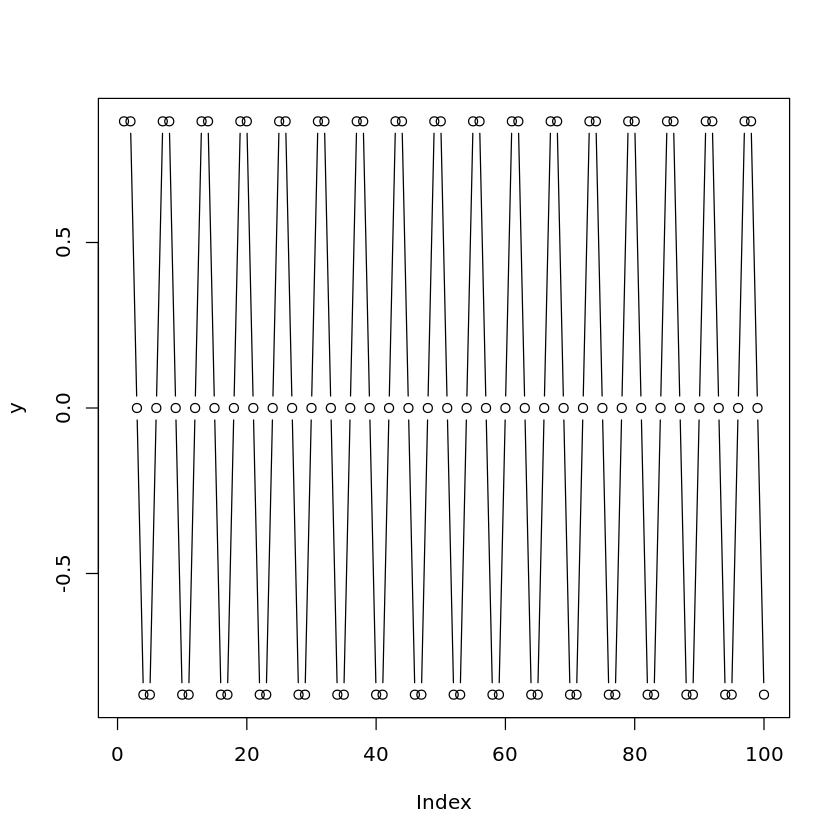

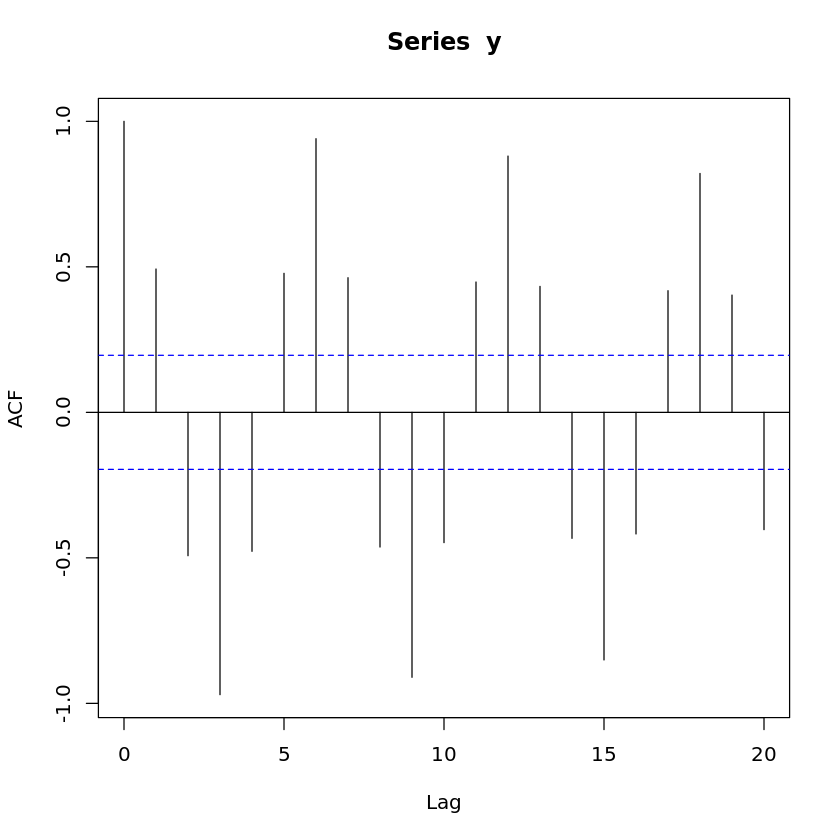

In [3]:
plot(y, type = 'b')
acf(y)

This sine series is a simple function and a fully determined system given a known
input sequence. Nonetheless, we do not have a correlation of 1. Why is that? Inspect
the series and think about what the ACF is calculating, and you will realize that for
many values, the subsequent value can go either up or down depending on where you
are in the cycle. If you know a few points in a row, you know which direction the
process is going, but if you don’t (as with the ACF, which is a 1:1 correlation
measure), you will have a correlation of less than 1 because most values do not have a
unique subsequent value but rather more than one. So, remember that a nonunitary
correlation does not mean you necessarily have a probabilistic or noisy time series.
